In [20]:
import sys
print(sys.executable)

/usr/local/bin/python3


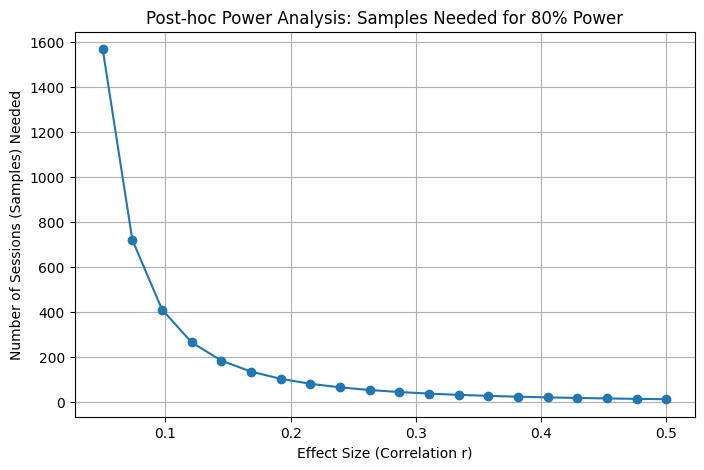

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm, spearmanr
from statsmodels.stats.power import TTestIndPower

def simulate_correlation(n_points=100, effect_size_r=0.3):
    """
    Simulate a single session's Spearman correlation between LC activity (Poisson) and pupil diameter (Gaussian),
    with a target effect size correlation r.
    """
    # Simulate LC activity as Poisson
    lc = poisson.rvs(mu=5, size=n_points)
    
    # Create pupil data correlated with LC activity
    noise = norm.rvs(size=n_points)
    pupil = effect_size_r * (lc - np.mean(lc)) / np.std(lc) + np.sqrt(1 - effect_size_r**2) * noise
    
    # Calculate Spearman correlation coefficient
    corr, _ = spearmanr(lc, pupil)
    return corr

def r_to_cohen_d(r):
    """
    Convert correlation coefficient r to Cohen's d for power analysis.
    """
    return 2 * r / np.sqrt(1 - r**2)

def main():
    power_analysis = TTestIndPower()
    alpha = 0.05
    power_target = 0.8
    
    # Effect sizes (correlations) to test
    effect_sizes_r = np.linspace(0.05, 0.5, 20)
    required_sample_sizes = []
    
    for r in effect_sizes_r:
        d = r_to_cohen_d(r)
        # Compute sample size needed for two-sided t-test with desired power and alpha
        n_samples = power_analysis.solve_power(effect_size=d, power=power_target, alpha=alpha, alternative='two-sided')
        required_sample_sizes.append(n_samples)
    
    # Plot results
    plt.figure(figsize=(8, 5))
    plt.plot(effect_sizes_r, required_sample_sizes, marker='o')
    plt.xlabel("Effect Size (Correlation r)")
    plt.ylabel("Number of Sessions (Samples) Needed")
    plt.title("Post-hoc Power Analysis: Samples Needed for 80% Power")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()

Mean null correlation (should be near 0): 0.0036


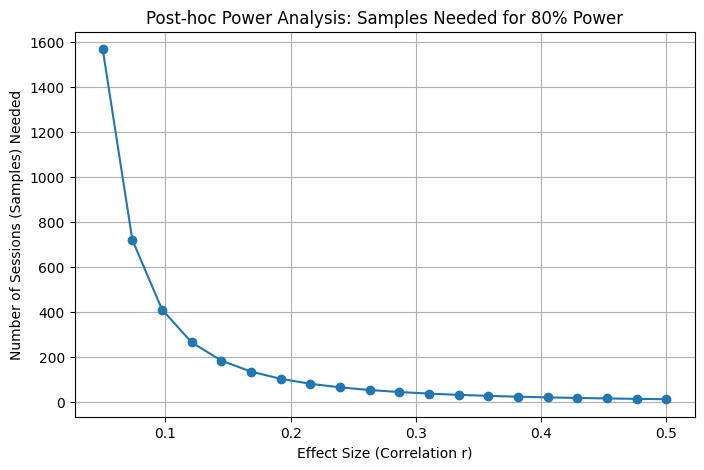

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm, spearmanr
from statsmodels.stats.power import TTestIndPower

def simulate_null_correlations(n_sessions=100, n_points=100):
    """
    Simulate null distribution of Spearman correlations from independent Poisson (LC)
    and Gaussian (pupil) data (i.e., no true correlation).
    """
    corrs = []
    for _ in range(n_sessions):
        lc = poisson.rvs(mu=5, size=n_points)  # Poisson spiking data
        pupil = norm.rvs(size=n_points)        # Independent Gaussian pupil data
        corr, _ = spearmanr(lc, pupil)
        corrs.append(corr)
    return np.array(corrs)

def simulate_effect_correlations(n_sessions=100, n_points=100, effect_size_r=0.3):
    """
    Simulate sessions where pupil data is correlated with LC activity (effect present).
    """
    corrs = []
    for _ in range(n_sessions):
        lc = poisson.rvs(mu=5, size=n_points)
        noise = norm.rvs(size=n_points)
        # Create correlated pupil data
        pupil = effect_size_r * (lc - np.mean(lc)) / np.std(lc) + np.sqrt(1 - effect_size_r**2) * noise
        corr, _ = spearmanr(lc, pupil)
        corrs.append(corr)
    return np.array(corrs)

def r_to_cohen_d(r):
    """Convert correlation coefficient r to Cohen's d."""
    return 2 * r / np.sqrt(1 - r**2)

def main():
    power_analysis = TTestIndPower()
    alpha = 0.05
    power_target = 0.8
    
    # Range of effect sizes to test (correlations)
    effect_sizes_r = np.linspace(0.05, 0.5, 20)
    required_sample_sizes = []
    
    # For demonstration: simulate null distribution (optional)
    null_corrs = simulate_null_correlations(n_sessions=100, n_points=100)
    print(f"Mean null correlation (should be near 0): {np.mean(null_corrs):.4f}")
    
    for r in effect_sizes_r:
        d = r_to_cohen_d(r)
        # Calculate sample size needed to detect effect size d with 80% power
        n_samples = power_analysis.solve_power(effect_size=d, power=power_target, alpha=alpha, alternative='two-sided')
        required_sample_sizes.append(n_samples)
    
    # Plot number of sessions needed vs effect size
    plt.figure(figsize=(8, 5))
    plt.plot(effect_sizes_r, required_sample_sizes, marker='o')
    plt.xlabel("Effect Size (Correlation r)")
    plt.ylabel("Number of Sessions (Samples) Needed")
    plt.title("Post-hoc Power Analysis: Samples Needed for 80% Power")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()

Effect size r = 0.05 → Cohen's d = 0.10 → Required n = 1566.8 sessions for 80% power
Effect size r = 0.07 → Cohen's d = 0.15 → Required n = 719.9 sessions for 80% power
Effect size r = 0.10 → Cohen's d = 0.20 → Required n = 411.0 sessions for 80% power
Effect size r = 0.12 → Cohen's d = 0.24 → Required n = 264.9 sessions for 80% power
Effect size r = 0.14 → Cohen's d = 0.29 → Required n = 184.4 sessions for 80% power
Effect size r = 0.17 → Cohen's d = 0.34 → Required n = 135.4 sessions for 80% power
Effect size r = 0.19 → Cohen's d = 0.39 → Required n = 103.4 sessions for 80% power
Effect size r = 0.22 → Cohen's d = 0.44 → Required n = 81.3 sessions for 80% power
Effect size r = 0.24 → Cohen's d = 0.49 → Required n = 65.5 sessions for 80% power
Effect size r = 0.26 → Cohen's d = 0.55 → Required n = 53.7 sessions for 80% power
Effect size r = 0.29 → Cohen's d = 0.60 → Required n = 44.8 sessions for 80% power
Effect size r = 0.31 → Cohen's d = 0.65 → Required n = 37.8 sessions for 80% po

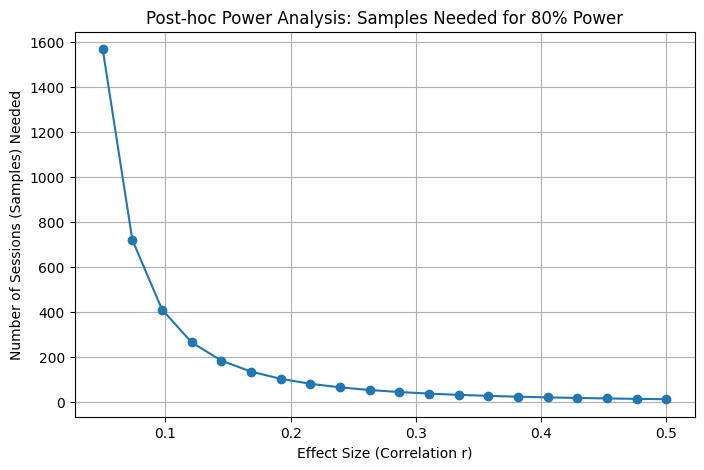

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm, spearmanr
from statsmodels.stats.power import TTestIndPower

def r_to_cohen_d(r):
    return 2 * r / np.sqrt(1 - r**2)

def main():
    power_analysis = TTestIndPower()
    alpha = 0.05
    power_target = 0.8

    effect_sizes_r = np.linspace(0.05, 0.5, 20)
    required_sample_sizes = []

    for r in effect_sizes_r:
        d = r_to_cohen_d(r)
        n_samples = power_analysis.solve_power(effect_size=d, power=power_target, alpha=alpha, alternative='two-sided')
        required_sample_sizes.append(n_samples)
        print(f"Effect size r = {r:.2f} → Cohen's d = {d:.2f} → Required n = {n_samples:.1f} sessions for 80% power")

    plt.figure(figsize=(8, 5))
    plt.plot(effect_sizes_r, required_sample_sizes, marker='o')
    plt.xlabel("Effect Size (Correlation r)")
    plt.ylabel("Number of Sessions (Samples) Needed")
    plt.title("Post-hoc Power Analysis: Samples Needed for 80% Power")
    plt.grid(True)
    plt.show()

main()

In [23]:
import matplotlib
import statsmodels
import numpy
import scipy

print("All imports successful!")

All imports successful!
